In [2]:
#数据归一化处理后，再进行补齐，以上轮档为归一化起点，但保留上轮档这一列数据，新生成一列数据
import pandas as pd
import numpy as np
data=pd.read_csv("cleand_final01.csv")
# print(data.columns)
#设置全局变量所有的变量name_index
name_index_global=['641 靠梯桥', '644 清洁完成', '645开货仓', '655 配餐完成',
       '660 机务完成', '662登机开始', '668关货仓 ', '669 撤轮档', '361机务完成', '365加油完成 缺失较多',
       '368开客舱', '369上轮档', '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥',
       '637关客舱']
other_index=['NO', 'flight', 'date','缺失个数']
#将日期转化为数字的函数
guiyi_data=data.copy()
def str_to_time(str_temp):
    # print(str_temp)
    try:
        str_list=str_temp.split(":")
        # x=
        return int(str_list[0])*60+int(str_list[1])
    except:
        return -1
#转化为日期后的数据函数
def trans_date_2_number():
    index_list=list(data.columns)[3:-1]
    print(data.columns)
    x=data["641 靠梯桥"][1]
    print(str_to_time(x))
    new_cleaned_data={}
    for node_name in index_list:
        data_temp=data[node_name]
        new_cleaned_data[node_name]=[]
        for i in range(len(data)):
            node_temp=str_to_time(data_temp[i])
            new_cleaned_data[node_name].append(node_temp)
            if i%10000==0:
                print(i)
    new_cleaned_data["date"]=list(data["date"])
    new_cleaned_data["flight"]=list(data["flight"])
    new_cleaned_data["缺失个数"]=list(data["缺失个数"])
    pd.DataFrame(new_cleaned_data).to_csv("cleaned_final02.csv")
try:
    data_01=pd.read_csv("cleaned_final02.csv")
    print("data_final02 exists!")
    print("load data_final02 success!")
except:
    print("data_final02 not exists!")

    trans_date_2_number()
    data_01=pd.read_csv("cleaned_final02.csv")
    print("load data_final02 success!")

data_final02 exists!
load data_final02 success!


In [2]:
#对加载好的数据进行处理，以'369上轮档'数据为0 进行初始化另外的数据
name_index_1=['641 靠梯桥', '644 清洁完成', '645开货仓', '655 配餐完成',
       '660 机务完成', '662登机开始', '668关货仓 ', '669 撤轮档', '361机务完成', '365加油完成 缺失较多',
       '368开客舱', '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥',
       '637关客舱']
name_begin='369上轮档'
data_02=data_01.copy()
def guiyihua_data():
    data_02["begin"]=[0 for i in range(len(data_01))]
    # for index in data_01.index:
        # value_beign=data_01.loc[index,name_begin]
    for name_change in name_index_1: #没有上轮档数据
        print(name_change)
        # value_temp=data_01.loc[index,name_change] #获取到的后续节点的值
        ##直接用datafram进行计算呢
        data_temp=data_01[name_change]!=-1 #找到索引name_index
        data_02.loc[data_temp,name_change]=data_01[data_temp][name_begin]-data_01[data_temp][name_change]
        """
        if value_temp!=-1 and value_temp-value_beign<100: #筛选出正常值进行计算
            if index%1000==0:
                print(value_temp,value_beign)
            value_temp=value_temp-value_beign #减去上轮档时间，然后进行填充
            data_02.loc[index,name_change]=value_temp
        else: #否则判断为异常值
            data_02.loc[index,name_change]=-1
        
            # print(value_temp)
            
    if index%10000==0:
            print(index)
    
    data_02.to_csv("cleaned_final03_%d.csv"%index)
    """
##第三次处理好的归一化后的数据大概4万多条
    data_02.to_csv("cleaned_final03.csv")
try:
    data_03=pd.read_csv("cleaned_final03.csv")
    print("加载数据成功")
except:
    print("加载数据失败，重新计算")
    guiyihua_data()
    data_03=pd.read_csv("cleaned_final03.csv")
    print("重新计算成功，加载到data_03中了")
##将差值在200以内的值计算出来了

加载数据失败，重新计算
641 靠梯桥
644 清洁完成
645开货仓
655 配餐完成
660 机务完成
662登机开始
668关货仓 
669 撤轮档
361机务完成
365加油完成 缺失较多
368开客舱
370登机结束
378 配餐开始 8个
379清洁开始
380撤梯桥
637关客舱
重新计算成功，加载到data_03中了


In [11]:
#将负值筛选出来，并统计数据条数，上面的步骤没有删除负的值，也就是时间早于撤轮档的时间，这部分数据剔除
#总得数据条数
def delete_false_value():
    data_04=data_03.copy()
    count_list=[]
    delited_nums=0 #被删除的条数
    all_nums=len(data_03) 
    for index in data_03.index:
        count=0
        for name in name_index_1:
            value=data_03.loc[index,name]
            if value<-1 or value>200 : #筛选条件为不空的值，且差值大于200
                count+=1
        if count>0:
            count_list.append(0)
            delited_nums+=1
            if delited_nums%1000==0:
                print(delited_nums)
        else:
            count_list.append(1)
    print("all nums %d delted numns %d"%(all_nums,delited_nums))
    data_04["count"]=count_list
    data_04=data_04[data_04["count"]!=0]
    data_04.to_csv("cleaned_final04.csv")
try:
    data_04=pd.read_csv("cleaned_final04.csv")
    print("去除负值的数据加载成功")
except:
    print("加载失败")
    print("重新计算去除负值的数据")
    delete_false_value()
    data_04=pd.read_csv("cleaned_final04.csv")
    print("计算成功，并保存到data04中了")  

加载失败
重新计算去除负值的数据
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
all nums 40699 delted numns 27949
计算成功，并保存到data04中了


D:\Anaconda364\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()


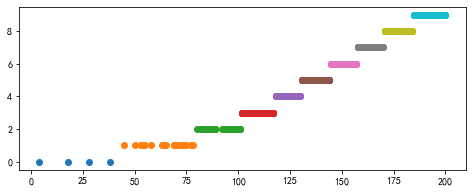

In [12]:
#对数据进行离散化处理，离散化方法为
#聚类离散化
# %matplotlib inline
# from sklearn.cluster import KMeans
# def cluster_plot(d, k): #自定义作图函数来显示聚类结果
#   import matplotlib.pyplot as plt
#   plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
#   plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
# 
#   plt.figure(figsize = (8, 3))
#   for j in range(0, k):
#     plt.plot(data_temp[d==j], [j for i in d[d==j]], 'o') #plt.plot(x,y,'o')
# 
#   plt.ylim(-0.5, k-0.5)
#   return plt
# K=10
# data_temp=data_04[data_04["361机务完成"]!=-1]["361机务完成"]
# kmodel=KMeans(n_clusters=K,n_jobs=32)
# kmodel.fit(data_temp.values.reshape(len(data_temp),1 ))
# c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)  #输出聚类中心，并且排序（默认是随机序的）
# w = pd.rolling_mean(c, 2).iloc[1:] #相邻两项求中点，作为边界点
# w = [0] + list(w[0]) + [data_temp.max()] #把首末边界点加上，w[0]中0为列索引
# d3 = pd.cut(data_temp.values, w, labels = range(K))
# cluster_plot(d3, K).show()
# #还不能进行离散化处理，因为离散化了以后会影响后面的预测
# ##基于概率的预测，预测置信度区间设置，多大概率落在这个区间内

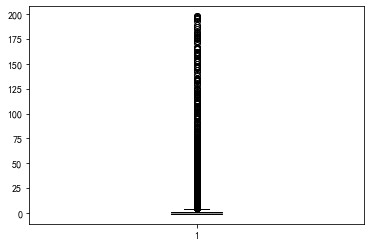

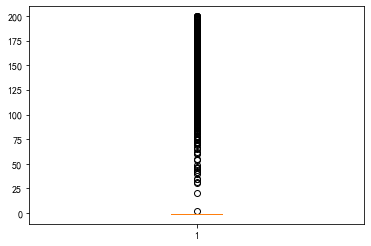

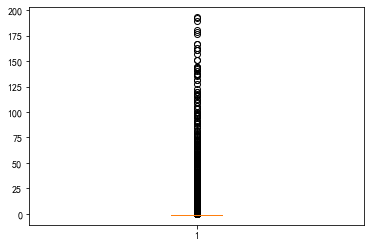

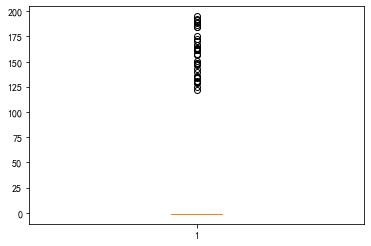

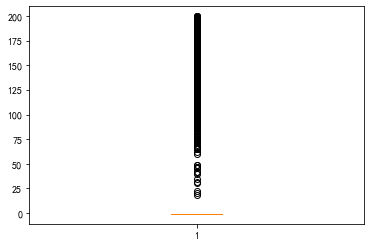

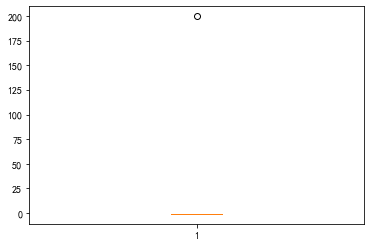

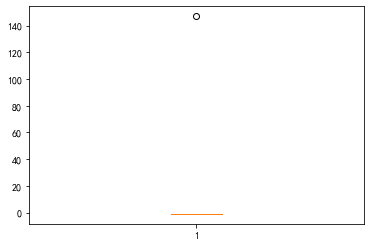

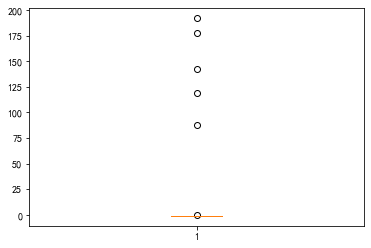

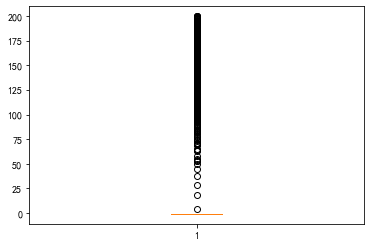

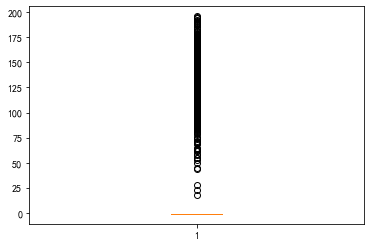

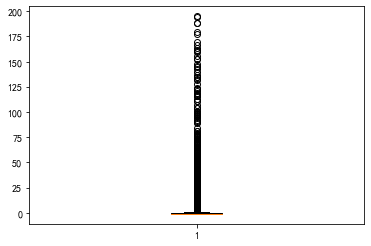

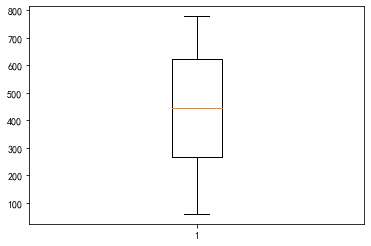

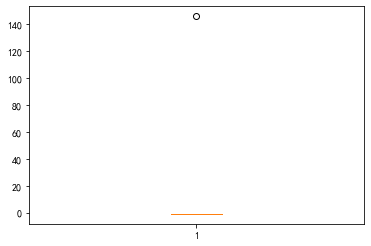

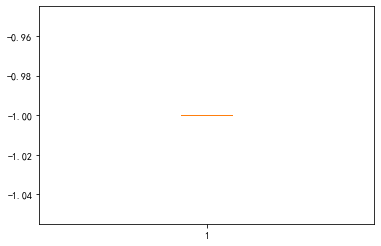

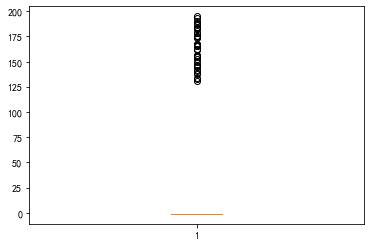

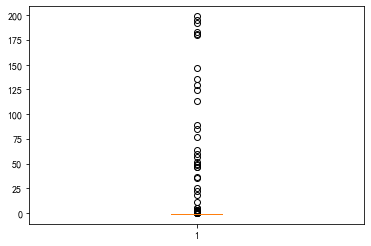

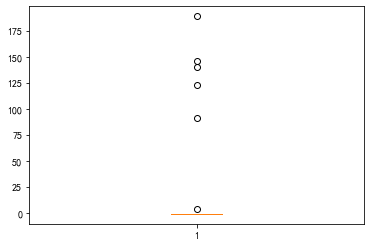

12750


In [17]:
# import matplotlib.pyplot as plt
# for name in name_index_global:
#     plt.boxplot(data_04[name])
#     plt.show()
#     plt.close()
# print(len(data_04)) #最终剩下的有效数据为12750条
# #利用环节之间的差值的数据进行挖掘

In [ ]:
#当前清洗好的数据为data_04
import pandas as pd
import numpy as np
name_index_global=['641 靠梯桥', '644 清洁完成', '645开货仓', '655 配餐完成',
       '660 机务完成', '662登机开始', '668关货仓 ', '669 撤轮档', '361机务完成', '365加油完成 缺失较多',
       '368开客舱', '369上轮档', '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥',
       '637关客舱']
data_04=pd.read_csv("cleaned_final04.csv")
data_05=data_04[name_index_global]
#得到新的数据，然后再利用贝叶斯网络参数估计对数据进行补齐操作
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
#获取两个变量之间的数据
def get_diff_of_two_node2(A,B,data):
    data_temp=data[[A,B]]
    data_temp=data_temp[data_temp[A]!=-1]
    data_temp=data_temp[data_temp[B]!=-1]
    return data_temp
#获取两个变量之间的诊断模型
def get_all_cpb_infer_models(name_list,data):
    model_dict={}
    for i in range(len(name_list)-1):
        for j in range(i+1,len(name_list)):
            A=name_list[i]
            B=name_list[j]
            name_compare=A+"_"+B
            print(A,B)
            try:
                model = BayesianModel([(A,B)])
                two_nodedata=get_diff_of_two_node2(A,B,data)
                model.fit(two_nodedata, estimator=MaximumLikelihoodEstimator)
                infer_temp=VariableElimination(model)
                #print(infer_temp.map_query([B], evidence={A: 90})) #查询的代码
                model_dict[name_compare]=infer_temp
            except:
                print(name_compare,"failed****************")
                model_dict[name_compare]=-1
    return model_dict
#获取所有模型的贝叶斯网络参数估计模型
def get_all_corrrelation_list(name_list):
    corr_dict={}
    for i in range(len(name_list)-1):
            for j in range(i+1,len(name_list)):
                A=name_list[i]
                B=name_list[j]
                name_compare=A+"_"+B
                print(A,B)
                try:
                    two_nodedata=get_diff_of_two_node2(A,B)
                    coor=two_nodedata.corr().iloc[0,1] #提取到的两个变量之间的相关系数
                    print(coor)
                    if coor>0:
                        corr_dict[name_compare]=coor
                    else:
                        corr_dict[name_compare]=-1
                except:
                    corr_dict[name_compare]=-1
    return corr_dict
#从字典中索引corrdata
def get_corr_data(A,B,corr_dict):
    name=A+"_"+B
    name2=B+"_"+A
    try:
        resul=corr_dict[name]
    except:
        resul=corr_dict[name2] 
    return resul
#对相关性进行排序
def get_sorted_corr_dict(name_list):
    corr_dict=get_all_corrrelation_list(name_list)
    corr_dict_sorted={} #计算好的按照相关度排序的节点名称
    for A in name_list:
        temp_dict={}
        for B in name_list:
            if B!=A:
                temp_dict[B]=get_corr_data(A,B,corr_dict)
        corr_dict_sorted[A] =sorted(temp_dict, key=lambda x:temp_dict[x])
    return corr_dict_sorted
def get_bayesin_model(A,B,all_model_cpb):
    name=A+"_"+B
    name2=B+"_"+A
    try:
        resul=all_model_cpb[name]
    except:
        resul=all_model_cpb[name2] 
    return resul
all_model_cpb=get_all_cpb_infer_models(name_index_global,data_05) #获得是所有的变量之间的模型
corr_dict_sorted=get_sorted_corr_dict(name_index_global)
##有了相关性，也有了数据，也有了模型，下一步对数据进行填充
#主要耗时不在模型的建立，而在于计算，因此建立循环计算模型来进行填充值
#必须把值填充成功的目标，挨个用每个值进行循环
data_06=data_05.copy()
def cleand_cycle(data_05,data_06,save_file="cleaned_final06.csv"):
    for target_name in name_index_global:
       name_compare_list=corr_dict_sorted[target_name]
       # print(name_compare_list)
       for index in data_05.index:
           current_value=data_05.loc[index,target_name]
           if current_value==-1:
               for name_compare in name_compare_list:
                   valule_compare=data_05.loc[index,name_compare]
                   if valule_compare!=-1:
                       #获取待比较的模型
                       model=get_bayesin_model(target_name,name_compare,all_model_cpb)
                       try:
                           target_value=model.map_query([target_name], evidence={name_compare: valule_compare},show_progress=False)
                           data_06.loc[index,target_name] = list(target_value.values())[0]
                           # print(target_value)
                           break
                       except:
                           continue
           if index%100==0:
               print(data_06.loc[index,target_name])
    data_06.to_csv(save_file)


    